# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [2]:
df = pd.read_csv("SMSN.IL.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-05-14,89.250000,89.250000,88.000000,88.500000,65.013130,197500
1,2001-05-15,87.239998,88.699997,87.000000,87.309998,64.138908,122000
2,2001-05-16,86.000000,87.269997,84.500000,84.750000,62.258305,278900
3,2001-05-17,89.010002,89.879997,87.000000,89.489998,65.740356,364300
4,2001-05-18,88.150002,90.000000,84.889999,89.430000,65.696281,199100


In [3]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5787.000000,5787.000000,5787.000000,5787.000000,5787.000000,5787.000000
mean,633.046973,636.948102,628.595339,633.053125,546.461474,33531.207707
std,453.717422,456.809322,449.814062,453.644532,444.241406,52324.447763
min,55.400002,55.400002,53.000000,55.400002,40.697472,0.000000
25%,285.000000,285.000000,285.000000,285.000000,209.364197,56.500000
50%,521.000000,524.500000,516.000000,520.500000,411.336121,17723.000000
75%,998.500000,1006.000000,990.250000,998.000000,873.343537,40700.000000
max,2054.000000,2070.000000,2042.000000,2064.000000,1946.878906,556400.000000


In [4]:
stock_data =df[["Date","Close"]] 
stock_data

,Date,Close
0,2001-05-14,88.500000
1,2001-05-15,87.309998
2,2001-05-16,84.750000
3,2001-05-17,89.489998
4,2001-05-18,89.430000
...,...,...
5782,2024-02-07,1406.000000
5783,2024-02-08,1381.000000
5784,2024-02-09,1402.000000
5785,2024-02-12,1431.000000


In [5]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5787 entries, 0 to 5786
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5787 non-null   object 
 1   Close   5787 non-null   float64
dtypes: float64(1), object(1)
memory usage: 90.5+ KB


In [6]:
stock_data["Date"] = pd.to_datetime(stock_data["Date"])


c:\Users\Tharun\anaconda3\envs\ai_assig_1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5787 entries, 0 to 5786
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5787 non-null   datetime64[ns]
 1   Close   5787 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 90.5 KB


In [8]:
stock_data.head()

,Date,Close
0,2001-05-14,88.500000
1,2001-05-15,87.309998
2,2001-05-16,84.750000
3,2001-05-17,89.489998
4,2001-05-18,89.430000


In [9]:
stock_data=stock_data.set_index("Date")
stock_data

,Close
Date,
2001-05-14,88.500000
2001-05-15,87.309998
2001-05-16,84.750000
2001-05-17,89.489998
2001-05-18,89.430000
...,...
2024-02-07,1406.000000
2024-02-08,1381.000000
2024-02-09,1402.000000


# Converting date column as a index column becuase:
1. Easy to retrive the data
2. Visualization is also simple
3. Statsmodel or scipy libraries require date column as index

# EDA

1. Summary Statistics
- Compute summary statistics such as mean, median, mode, standard deviation, to get an overview of the data.

2. Visualize the Time Series Data
- Plot the Time Series data 

- Plot the rolling mean and rolling standard deviation of the Time Series data.
- Decompose the Time Series Data check for any trends, seasonality, and Noise.
- Plot the decomposed components to get a better understanding of the Time Series data.

3. Stationarity Check
- Check for stationarity.
- Check for stationarity of the Time Series data using the Augmented Dickey-Fuller test.

4. Check for Autocorrelation
- Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the order of the ARIMA model.

5. Outlier Detection
- Detect and handle outliers using statistical methods or machine learning techniques.

6. Check for Autocorrelation
- Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the order of the ARIMA model.


In [10]:
stock_data.describe()

,Close
count,5787.000000
mean,633.053125
std,453.644532
min,55.400002
25%,285.000000
50%,520.500000
75%,998.000000
max,2064.000000


In [11]:
stock_data.isnull().sum()

Close    0
dtype: int64

## Distribution of stock_data

(array([1308., 1431.,  888.,  410.,  539.,  576.,  306.,  155.,  130.,
          44.]),
 array([  55.400002 ,  256.2600018,  457.1200016,  657.9800014,
         858.8400012, 1059.700001 , 1260.5600008, 1461.4200006,
        1662.2800004, 1863.1400002, 2064.       ]),
 <BarContainer object of 10 artists>)

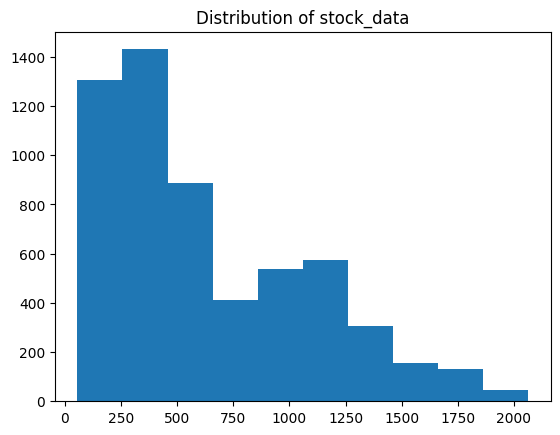

In [12]:
plt.title("Distribution of stock_data")
plt.hist(stock_data.Close)

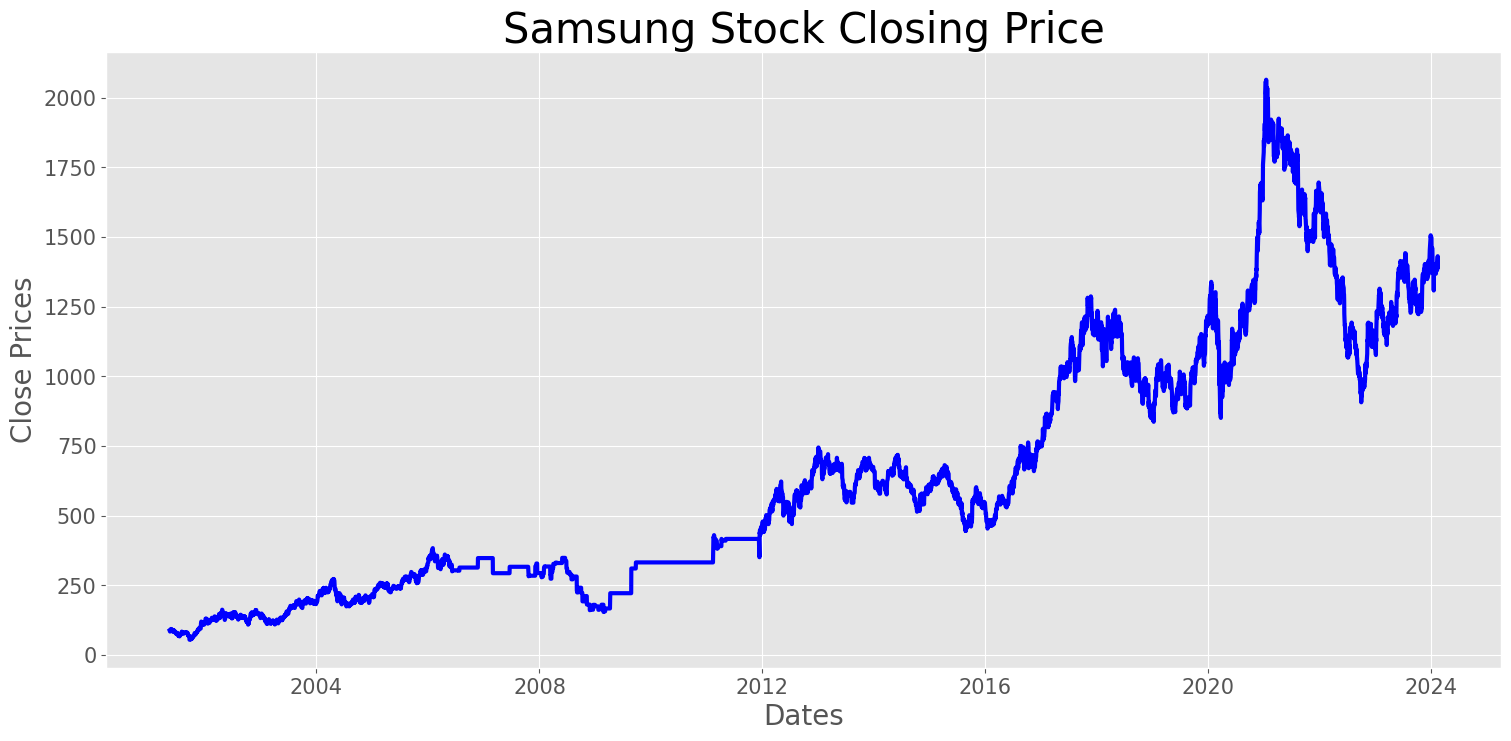

In [13]:
plt.style.use("ggplot")
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates',fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel('Close Prices', fontsize=20)
plt.yticks(fontsize=15)
plt.plot(stock_data["Close"],linewidth=3,color='blue')
plt.title('Samsung Stock Closing Price', fontsize=30)
plt.show()

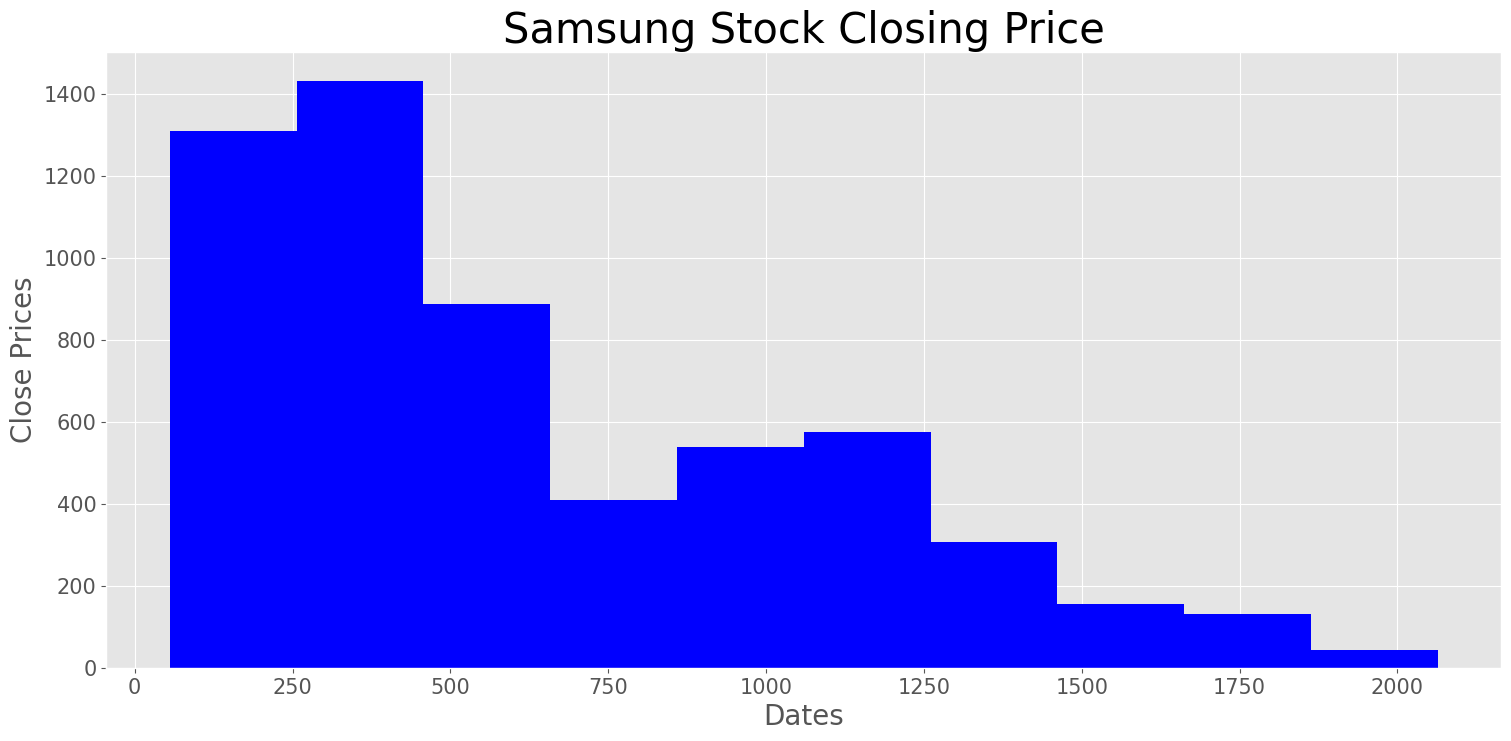

In [14]:
plt.style.use("ggplot")
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates',fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel('Close Prices', fontsize=20)
plt.yticks(fontsize=15)
plt.hist(stock_data["Close"],linewidth=3,color='blue')
plt.title('Samsung Stock Closing Price', fontsize=30)
plt.show()

# Distribution of the close price

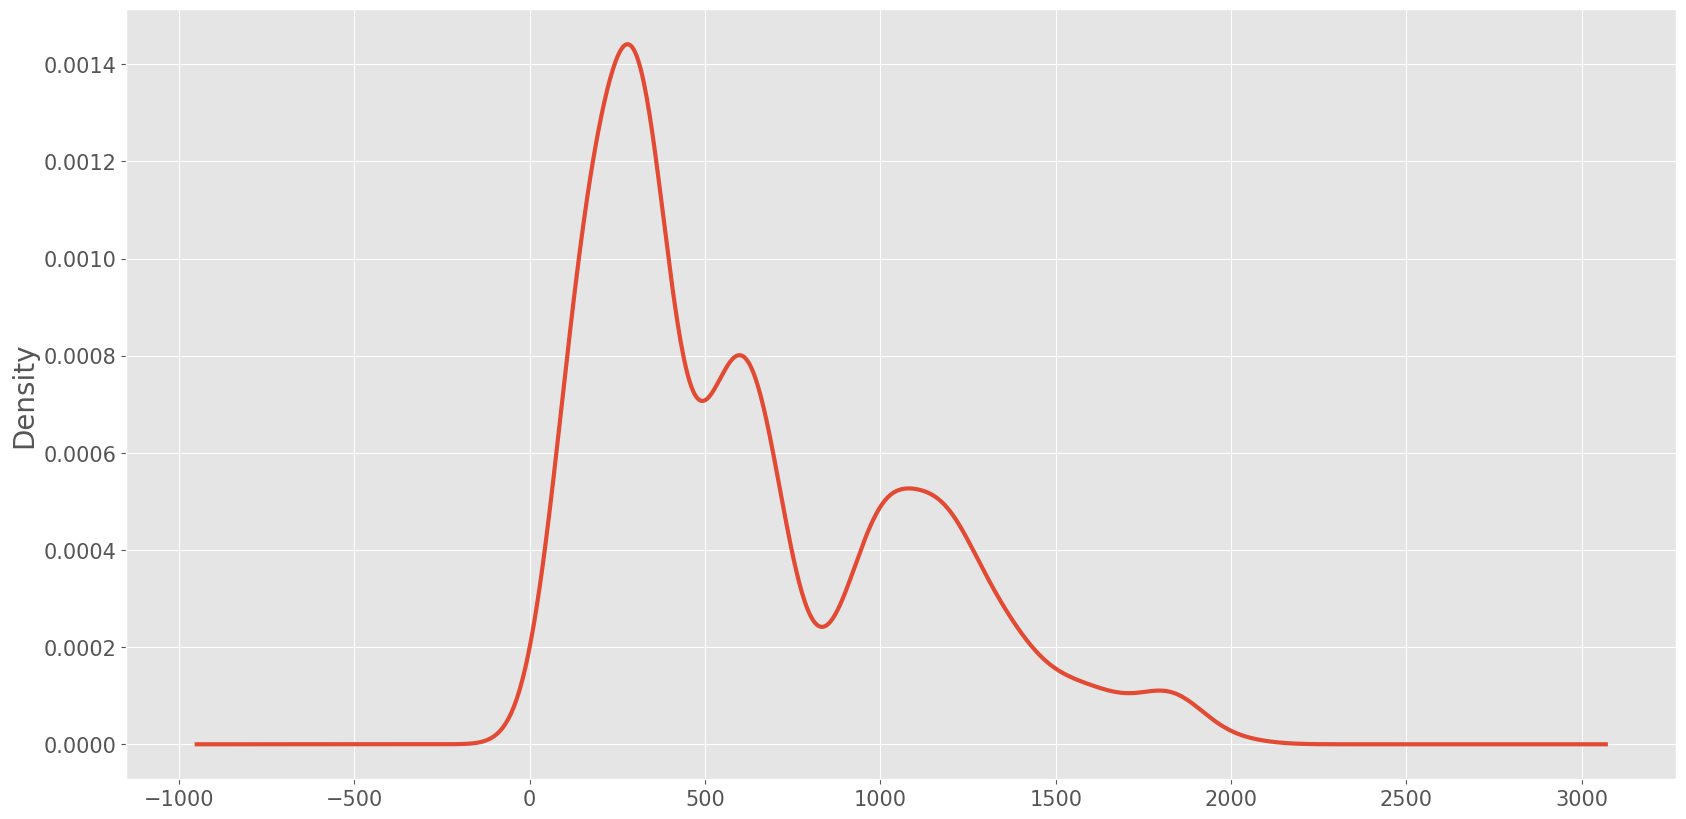

In [15]:
df_close = stock_data['Close']
df_close.plot(kind='kde',figsize=(20,10),linewidth=3)
plt.xticks(fontsize=15)
plt.grid("both")
plt.ylabel("Density",fontsize=20)
plt.yticks(fontsize=15)
plt.show()

Calculating rolling mean for window size = 12 days

In [16]:
rolmean=stock_data["Close"].rolling(12).mean()

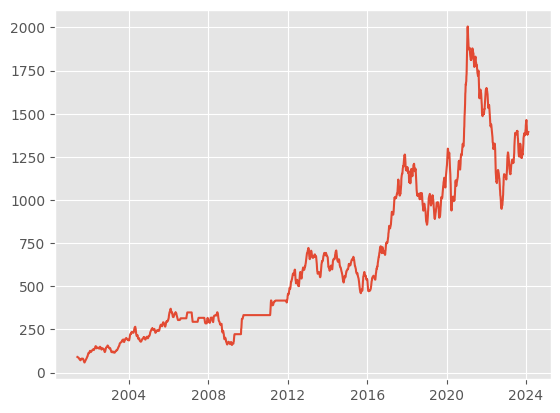

In [17]:
plt.plot(rolmean)

Calculating rolling mean for window size = 24 days

In [18]:
rolmean=stock_data["Close"].rolling(24).mean()

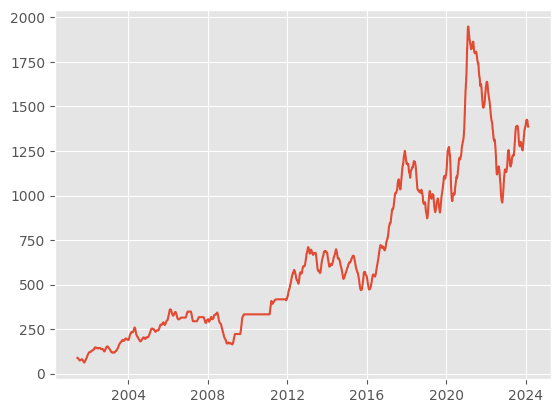

In [19]:
plt.plot(rolmean)

Calculating rolling mean for window size = 365 days

In [20]:
rolmean=stock_data["Close"].rolling(365).mean()

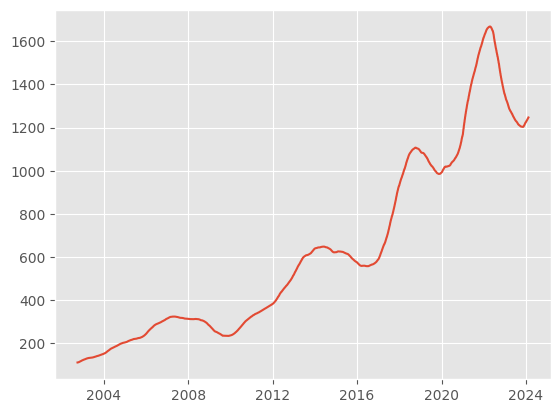

In [21]:
plt.plot(rolmean)

In [22]:
rolstd = stock_data['Close'].rolling(12).std()

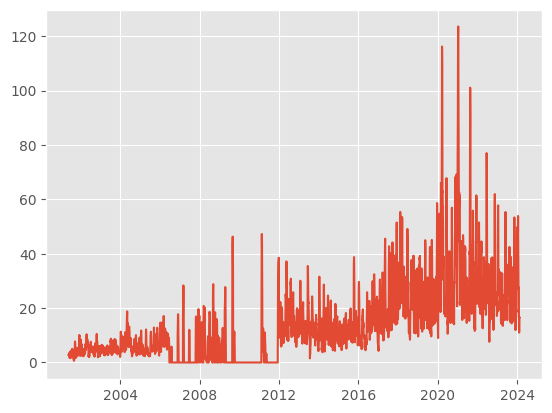

In [23]:
plt.plot(rolstd)

In [24]:
rolstd = stock_data['Close'].rolling(24).std()

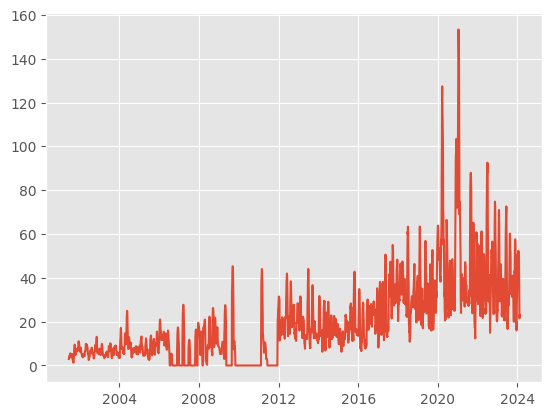

In [25]:
plt.plot(rolstd)

In [26]:
rolstd = stock_data['Close'].rolling(365).std()

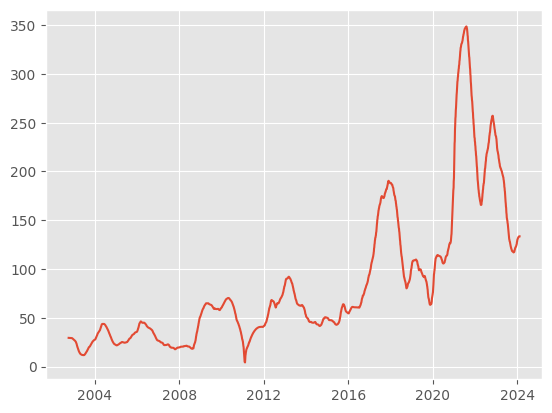

In [27]:
plt.plot(rolstd)

In [28]:
rolmean=stock_data["Close"].rolling(48).mean()
rolstd = stock_data["Close"].rolling(48).std()

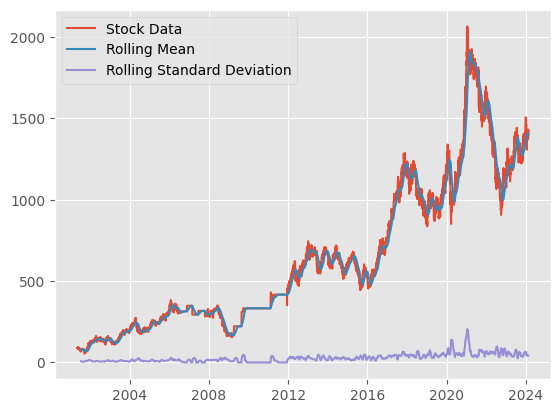

In [29]:
plt.plot(stock_data.Close)
plt.plot(rolmean)
plt.plot(rolstd)
plt.legend(['Stock Data', 'Rolling Mean', 'Rolling Standard Deviation'])
plt.show()

# ADF (Ada Fuller Test)

### ADF test is a statistical approach to find the time is stionary or non stationary

In [30]:
from statsmodels.tsa.stattools import adfuller
adft = adfuller(stock_data["Close"])

In [31]:
adft

(-0.7805927944638086,
 0.8247564260650994,
 15,
 5771,
 {'1%': -3.4314836356032568,
  '5%': -2.862040959083449,
  '10%': -2.5670366585936693},
 46731.531656655105)

In [32]:
pd.Series(adft[0:4],index=["test stats","p-value","lag","data points"])

test stats       -0.780593
p-value           0.824756
lag              15.000000
data points    5771.000000
dtype: float64

In [33]:
#Test for staionarity
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(48).mean() # rolling mean
    rolstd = timeseries.rolling(48).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    

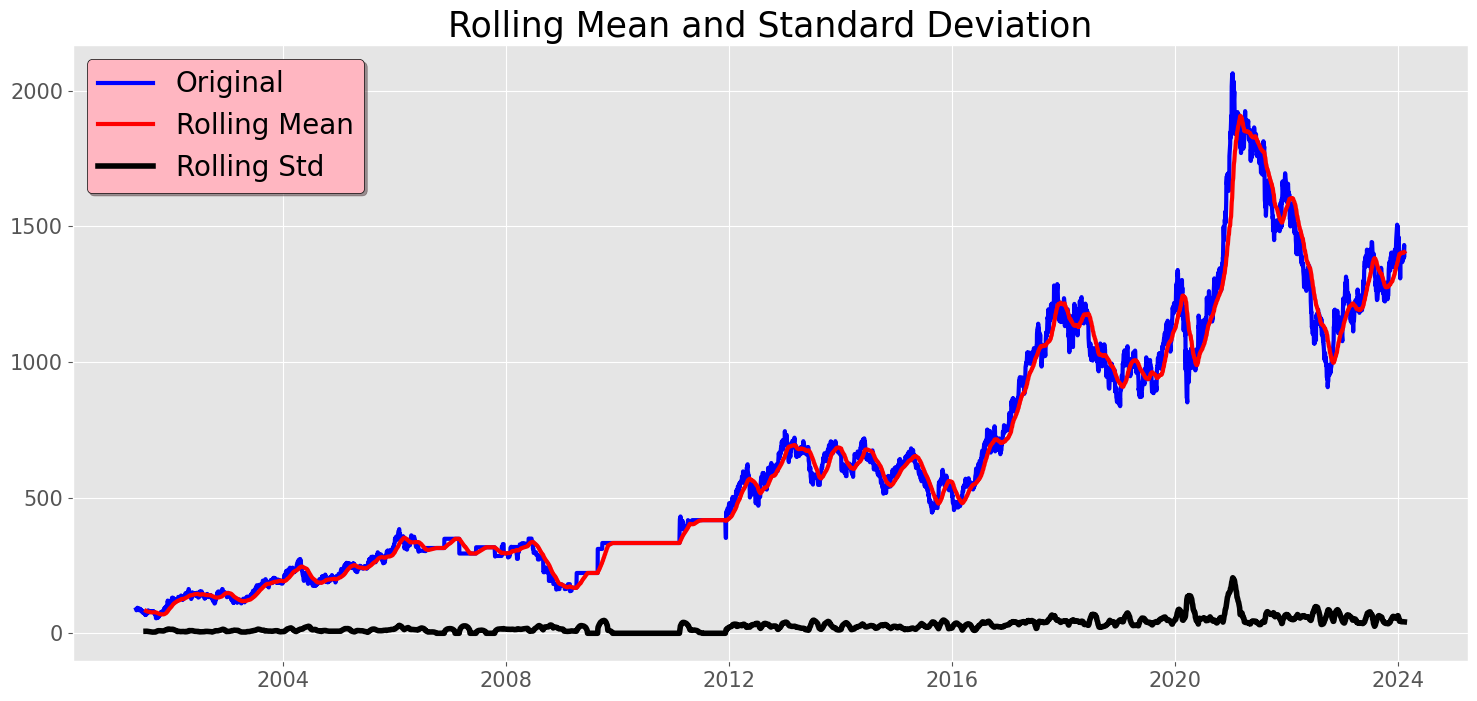

Results of dickey fuller test
Test Statistics                  -0.780593
p-value                           0.824756
No. of lags used                 15.000000
Number of observations used    5771.000000
critical value (1%)              -3.431484
critical value (5%)              -2.862041
critical value (10%)             -2.567037
dtype: float64


In [34]:
test_stationarity(stock_data.Close)


### If the p-value is < 0.05 reject the null hypothesis (null hypothesis is my data is non stationary) and if p-value is >0.05 accept the null hypothesis
### Hence we came to know that this dataset is a non-stationary time series dataset

## Time decompose data into different components

In [35]:
from  statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(stock_data[["Close"]],period=12)
result.seasonal

Date
2001-05-14   -0.714775
2001-05-15   -0.691859
2001-05-16   -0.248219
2001-05-17   -0.295884
2001-05-18   -0.111617
                ...   
2024-02-07    0.576088
2024-02-08   -0.165988
2024-02-09   -0.714775
2024-02-12   -0.691859
2024-02-13   -0.248219
Name: seasonal, Length: 5787, dtype: float64

Model is Additive

<Figure size 2000x1000 with 0 Axes>

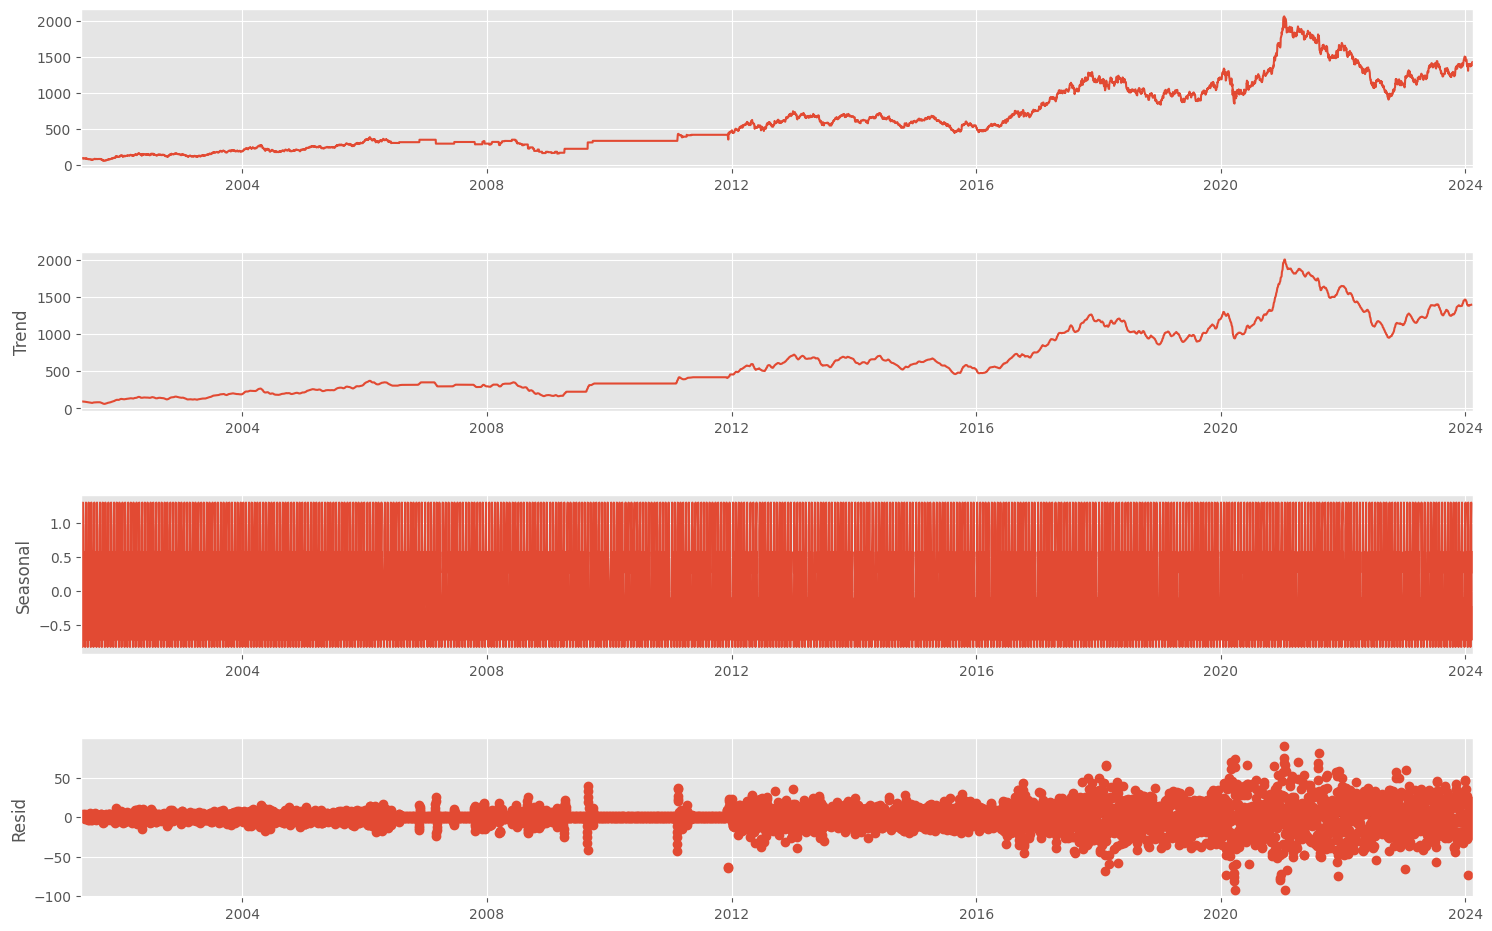

In [36]:
fig = plt.figure(figsize=(20,10))
fig = result.plot()
fig.set_size_inches(17,10)

Model is Multiplicative

In [37]:
from  statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(stock_data[["Close"]],period=12,model="multiplicative")

<Figure size 2000x1000 with 0 Axes>

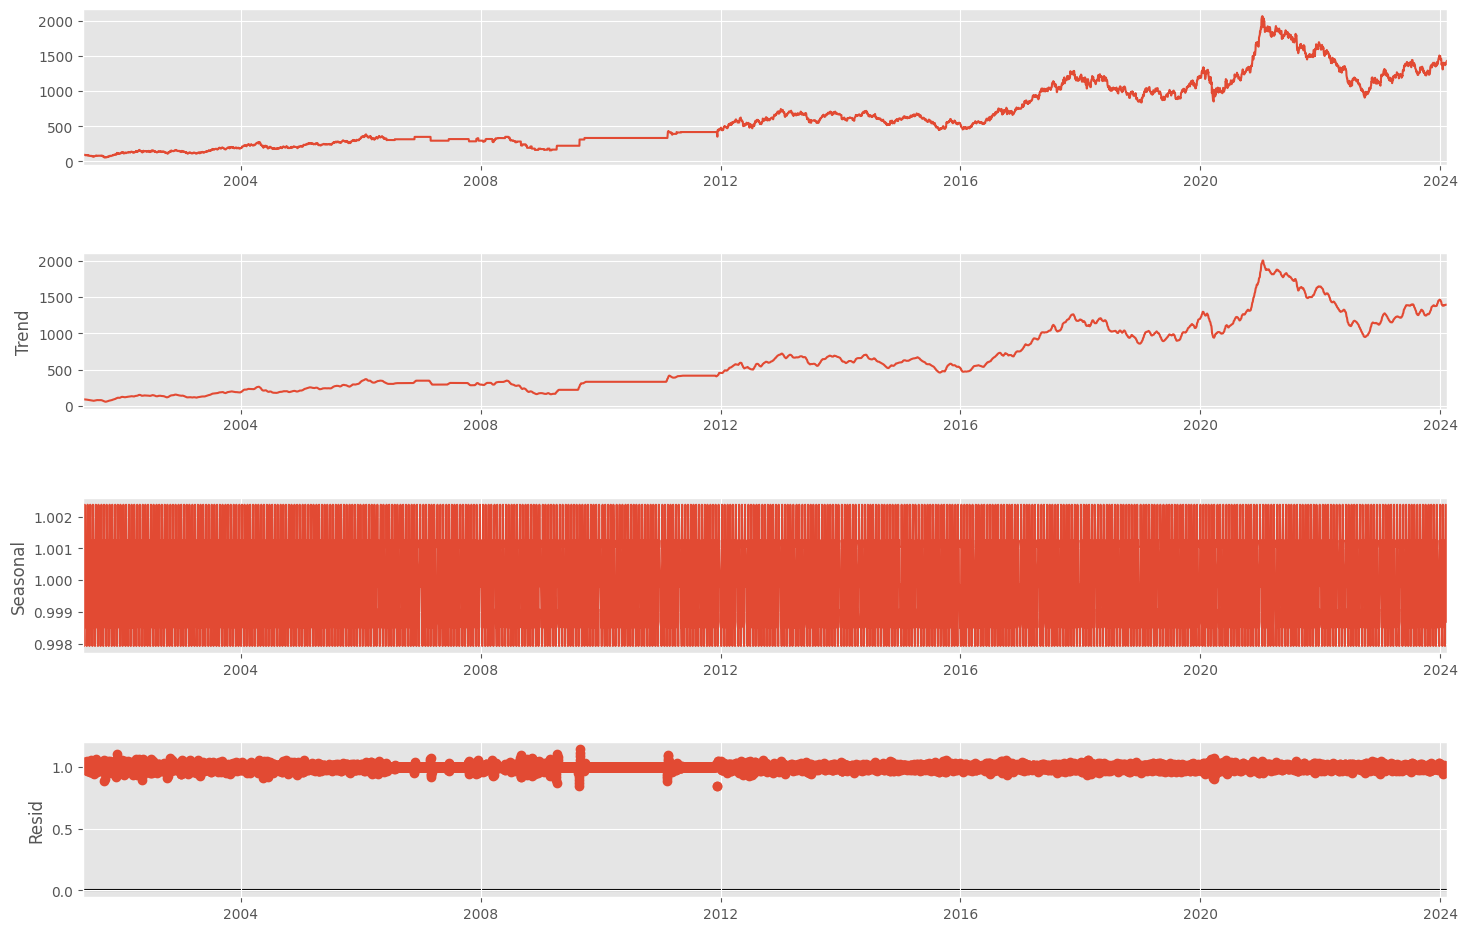

In [38]:
fig = plt.figure(figsize=(20,10))
fig = result.plot()
fig.set_size_inches(17,10)

<AxesSubplot:>

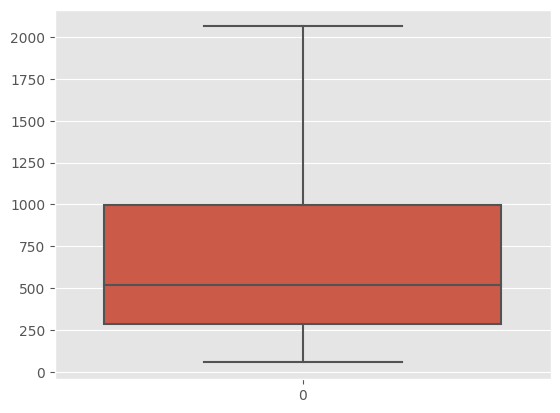

In [39]:
sns.boxplot(stock_data.Close)

In [40]:
max_close_value=np.max(stock_data['Close'])
max_close_rows = stock_data[stock_data['Close'] == max_close_value]
max_close_rows

,Close
Date,
2021-01-14,2064.0


In [41]:
stock_data.describe()

,Close
count,5787.000000
mean,633.053125
std,453.644532
min,55.400002
25%,285.000000
50%,520.500000
75%,998.000000
max,2064.000000


In [42]:
stock_data

,Close
Date,
2001-05-14,88.500000
2001-05-15,87.309998
2001-05-16,84.750000
2001-05-17,89.489998
2001-05-18,89.430000
...,...
2024-02-07,1406.000000
2024-02-08,1381.000000
2024-02-09,1402.000000


# Checking Auto Correlation Function and Partial Auto Correlation Function

c:\Users\Tharun\anaconda3\envs\ai_assig_1\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


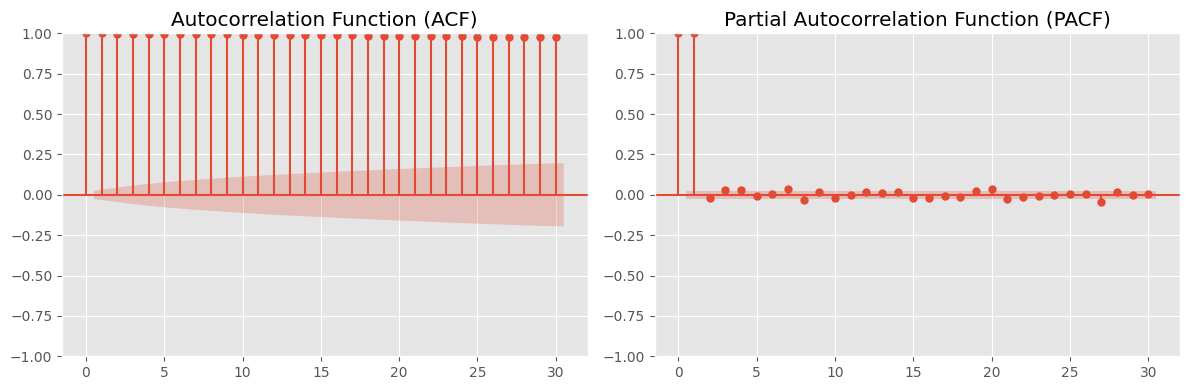

In [43]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming 'stock_data' is your DataFrame with 'Close' column
plt.figure(figsize=(12, 4))

# ACF plot
plt.subplot(1, 2, 1)
plot_acf(stock_data['Close'], lags=30, ax=plt.gca(), title='Autocorrelation Function (ACF)')

# PACF plot
plt.subplot(1, 2, 2)
plot_pacf(stock_data['Close'], lags=30, ax=plt.gca(), title='Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


# Preprocessing of the data

1.Fill the missing values (Here not required)

2.Convert data from non stationary into stationary time series

3.If necessary then normalize the data (here not required)

4.Split the data into train and test

5.Clean the data by removing the outlier

In [44]:
df_close=stock_data["Close"]
df_close

Date
2001-05-14      88.500000
2001-05-15      87.309998
2001-05-16      84.750000
2001-05-17      89.489998
2001-05-18      89.430000
                 ...     
2024-02-07    1406.000000
2024-02-08    1381.000000
2024-02-09    1402.000000
2024-02-12    1431.000000
2024-02-13    1393.000000
Name: Close, Length: 5787, dtype: float64

In [45]:
df_close=df_close.diff()
df_close=df_close.dropna()

In [46]:
df_close

Date
2001-05-15    -1.190002
2001-05-16    -2.559998
2001-05-17     4.739998
2001-05-18    -0.059998
2001-05-21     3.419998
                ...    
2024-02-07     5.000000
2024-02-08   -25.000000
2024-02-09    21.000000
2024-02-12    29.000000
2024-02-13   -38.000000
Name: Close, Length: 5786, dtype: float64

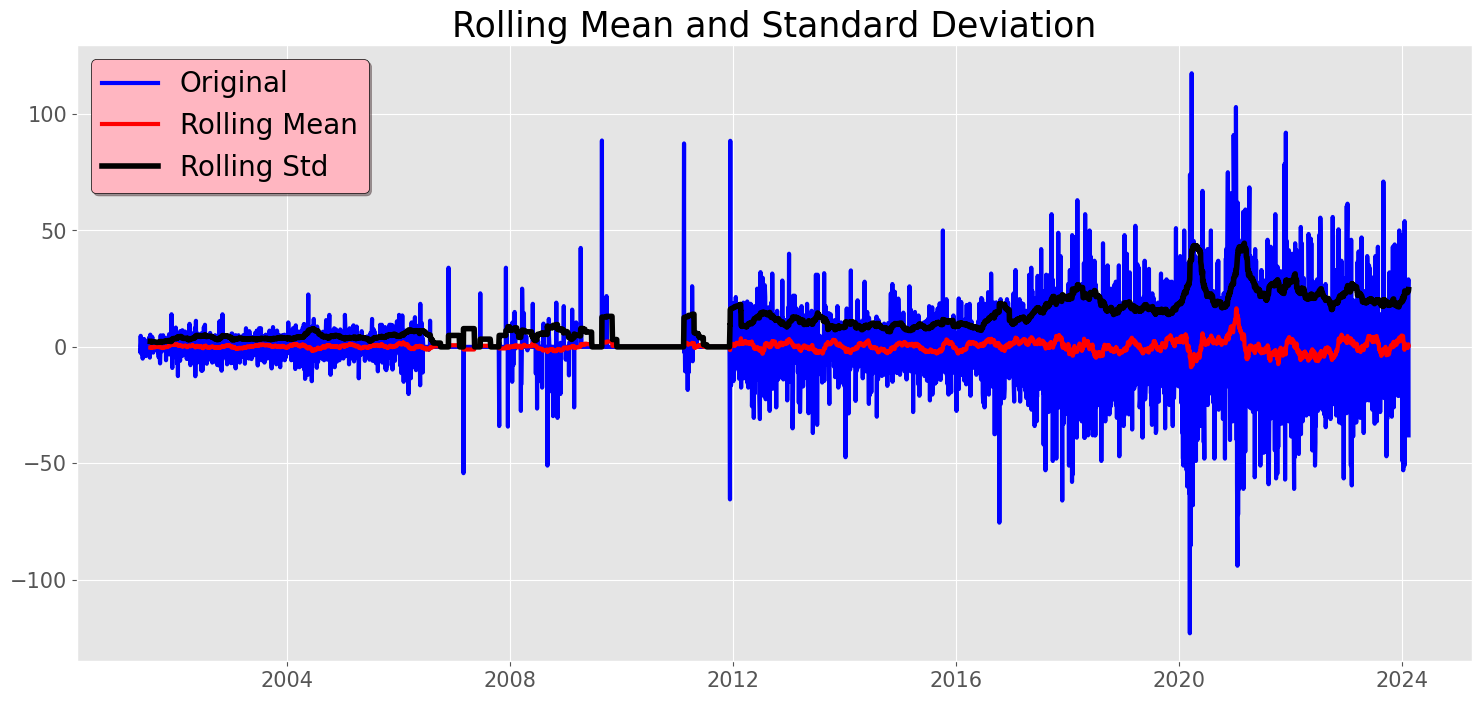

Results of dickey fuller test
Test Statistics                 -19.847024
p-value                           0.000000
No. of lags used                 14.000000
Number of observations used    5771.000000
critical value (1%)              -3.431484
critical value (5%)              -2.862041
critical value (10%)             -2.567037
dtype: float64


In [47]:
test_stationarity(df_close)

Here P-value is almost zero hence we can reject null hypothesis i.e. The time series is non stionary.

c:\Users\Tharun\anaconda3\envs\ai_assig_1\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


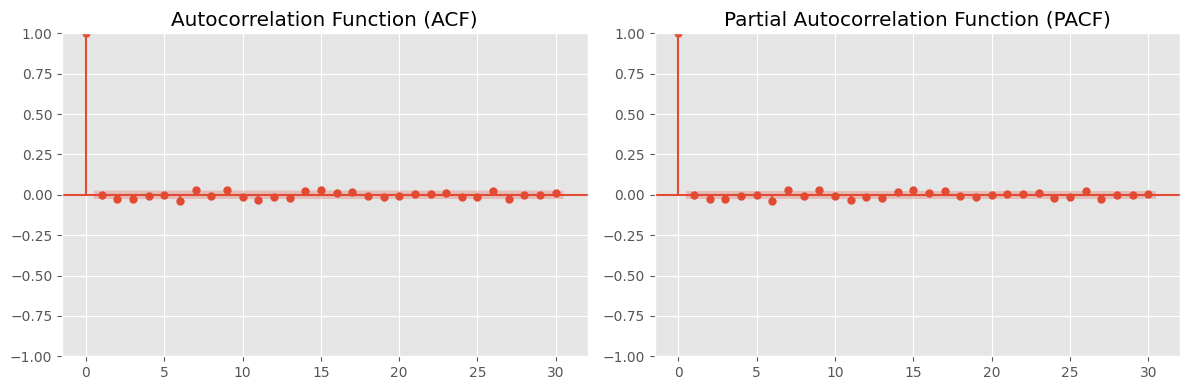

In [48]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming 'stock_data' is your DataFrame with 'Close' column
plt.figure(figsize=(12, 4))

# ACF plot
plt.subplot(1, 2, 1)
plot_acf(df_close, lags=30, ax=plt.gca(), title='Autocorrelation Function (ACF)')

# PACF plot
plt.subplot(1, 2, 2)
plot_pacf(df_close, lags=30, ax=plt.gca(), title='Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


## Spliting the data into train and test

Here we are not going to use the differencing data (df_close) for the train test split and for the model because ARIMA does this step by itself.

In [49]:
stock_data_reset = stock_data.reset_index()
stock_data_reset

,Date,Close
0,2001-05-14,88.500000
1,2001-05-15,87.309998
2,2001-05-16,84.750000
3,2001-05-17,89.489998
4,2001-05-18,89.430000
...,...,...
5782,2024-02-07,1406.000000
5783,2024-02-08,1381.000000
5784,2024-02-09,1402.000000
5785,2024-02-12,1431.000000


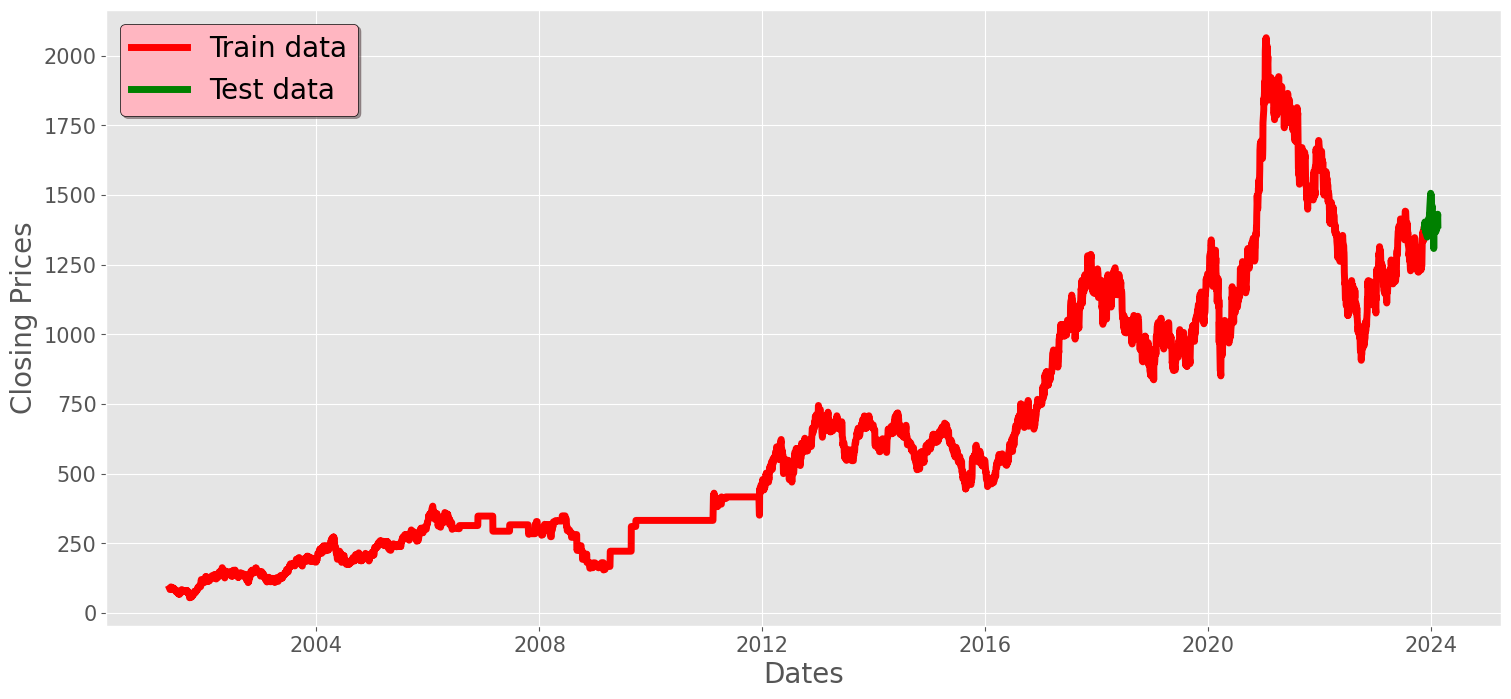

In [50]:
import matplotlib.pyplot as plt

train_data = stock_data_reset.iloc[:-60]
test_data = stock_data_reset.iloc[-60:]

plt.figure(figsize=(18, 8))
plt.grid(True)
plt.xlabel('Dates', fontsize=20)
plt.ylabel('Closing Prices', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Plotting using the 'Date' column as the x-axis
plt.plot(train_data['Date'], train_data['Close'], 'red', label='Train data', linewidth=5)
plt.plot(test_data['Date'], test_data['Close'], 'green', label='Test data', linewidth=5)

plt.legend(fontsize=20, shadow=True, facecolor='lightpink', edgecolor='k')
plt.show()


## Building Time Series Model

In [51]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [52]:
history = [x for x in train_data.Close]
history

[88.5,
 87.309998,
 84.75,
 89.489998,
 89.43,
 92.849998,
 94.0,
 94.0,
 91.050003,
 90.010002,
 90.010002,
 92.0,
 86.949997,
 85.800003,
 86.279999,
 85.900002,
 84.449997,
 85.18,
 87.0,
 90.400002,
 88.199997,
 84.699997,
 87.639999,
 85.0,
 85.0,
 84.0,
 84.949997,
 81.0,
 79.75,
 78.75,
 78.919998,
 76.419998,
 75.730003,
 76.620003,
 78.449997,
 79.349998,
 79.0,
 79.970001,
 77.0,
 74.5,
 71.470001,
 71.349998,
 68.809998,
 72.900002,
 72.900002,
 68.279999,
 67.300003,
 68.25,
 73.5,
 72.0,
 71.599998,
 72.050003,
 74.25,
 74.800003,
 77.599998,
 77.93,
 80.300003,
 84.57,
 83.699997,
 82.339996,
 81.5,
 79.029999,
 78.07,
 77.010002,
 78.0,
 80.470001,
 81.739998,
 81.25,
 80.5,
 79.099998,
 78.25,
 80.0,
 80.75,
 80.610001,
 80.5,
 80.5,
 81.0,
 80.300003,
 81.5,
 80.25,
 79.599998,
 81.75,
 80.010002,
 78.260002,
 79.25,
 78.620003,
 75.0,
 70.5,
 72.300003,
 69.0,
 69.5,
 69.199997,
 68.599998,
 62.5,
 55.400002,
 55.400002,
 60.349998,
 59.5,
 57.32,
 58.900002,
 58.0,
 

In [53]:
model=ARIMA(history,order=(1,1,1))

In [54]:
model = model.fit()

c:\Users\Tharun\anaconda3\envs\ai_assig_1\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Tharun\anaconda3\envs\ai_assig_1\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [55]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5727
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -23202.035
Date:                Wed, 14 Feb 2024   AIC                          46410.070
Time:                        17:47:01   BIC                          46430.029
Sample:                             0   HQIC                         46417.018
                               - 5727                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0010      3.688     -0.000      1.000      -7.230       7.228
ma.L1         -0.0010      3.689     -0.000      1.000      -7.232       7.230
sigma2       193.6748      1.557    124.394      0.000     190.623     196.726
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             18578.34
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):              22.18   Skew:                             0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [56]:
model.forecast()

array([1384.00193167])

In [57]:
train_data=train_data.set_index('Date')
train_data

,Close
Date,
2001-05-14,88.500000
2001-05-15,87.309998
2001-05-16,84.750000
2001-05-17,89.489998
2001-05-18,89.430000
...,...
2023-11-10,1338.000000
2023-11-13,1337.000000
2023-11-14,1381.000000


In [58]:
test_data=test_data.set_index('Date')
train_data

,Close
Date,
2001-05-14,88.500000
2001-05-15,87.309998
2001-05-16,84.750000
2001-05-17,89.489998
2001-05-18,89.430000
...,...
2023-11-10,1338.000000
2023-11-13,1337.000000
2023-11-14,1381.000000


In [59]:
train_data.index = pd.to_datetime(train_data.index)
test_data.index = pd.to_datetime(test_data.index)

In [60]:
test_val =test_data.Close
test_val[0]

1386.0

In [61]:
mean_squared_error([test_val[0]],model.forecast())

3.9922770542530213

In [62]:
np.sqrt(mean_squared_error([test_val[0]],model.forecast()))

1.99806833072671

In [63]:
p_values = range(0,3)
d_values = range(0,3)
q_values = range(0,3)

In [64]:
def train_arima_model(X, y, arima_order):
    # prepare training dataset
    # make predictions list
    history = [x for x in X]
    predictions = list()
    for t in range(len(y)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(y[t])
    # calculate out of sample error
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return rmse

In [65]:
def evaluate_model(dataset,test,p_values,d_values,q_values):
    dataset = dataset.astype('float32')
    best_score,best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = train_arima_model(dataset,test,order)
                    if rmse < best_score:
                        best_score,best_cfg = rmse,order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg,best_score))


In [66]:
print(train_data.dtypes)
print(test_data.dtypes)


Close    float64
dtype: object
Close    float64
dtype: object


In [67]:
import warnings
warnings.filterwarnings('ignore')
p_values = range(0,3)
d_values = range(0,3)
q_values = range(0,3)
evaluate_model(train_data['Close'],test_data['Close'],p_values,d_values,q_values)

ARIMA(0, 0, 0) RMSE=772.536
ARIMA(0, 0, 1) RMSE=399.451
ARIMA(0, 0, 2) RMSE=220.798
ARIMA(0, 1, 0) RMSE=22.570
ARIMA(0, 1, 1) RMSE=22.577
ARIMA(0, 1, 2) RMSE=22.467
ARIMA(0, 2, 0) RMSE=31.635
ARIMA(0, 2, 1) RMSE=22.572
ARIMA(0, 2, 2) RMSE=22.578
ARIMA(1, 0, 0) RMSE=22.575
ARIMA(1, 0, 1) RMSE=22.582
ARIMA(1, 0, 2) RMSE=22.474
ARIMA(1, 1, 0) RMSE=22.577
ARIMA(1, 1, 1) RMSE=22.577
ARIMA(1, 1, 2) RMSE=22.468
ARIMA(1, 2, 0) RMSE=29.478
ARIMA(1, 2, 1) RMSE=22.578
ARIMA(1, 2, 2) RMSE=22.707
ARIMA(2, 0, 0) RMSE=22.582
ARIMA(2, 0, 1) RMSE=22.709
ARIMA(2, 0, 2) RMSE=22.474
ARIMA(2, 1, 0) RMSE=22.467
ARIMA(2, 1, 1) RMSE=22.482
ARIMA(2, 1, 2) RMSE=22.563
ARIMA(2, 2, 0) RMSE=27.294
ARIMA(2, 2, 1) RMSE=22.468
ARIMA(2, 2, 2) RMSE=22.732
Best ARIMA(0, 1, 2) RMSE=22.467


In [68]:
history = [x for x in train_data['Close']]
predictions = list()
for i in range(len(test_data['Close'])):
    model=ARIMA(history,order=(2,0,2))
    model = model.fit()
    fc = model.forecast(alpha=0.05)
    predictions.append(fc)
    history.append(test_data['Close'][i])
print(f"RMSE is {np.sqrt(mean_squared_error(test_data['Close'],predictions))}")

RMSE is 22.473525528883044


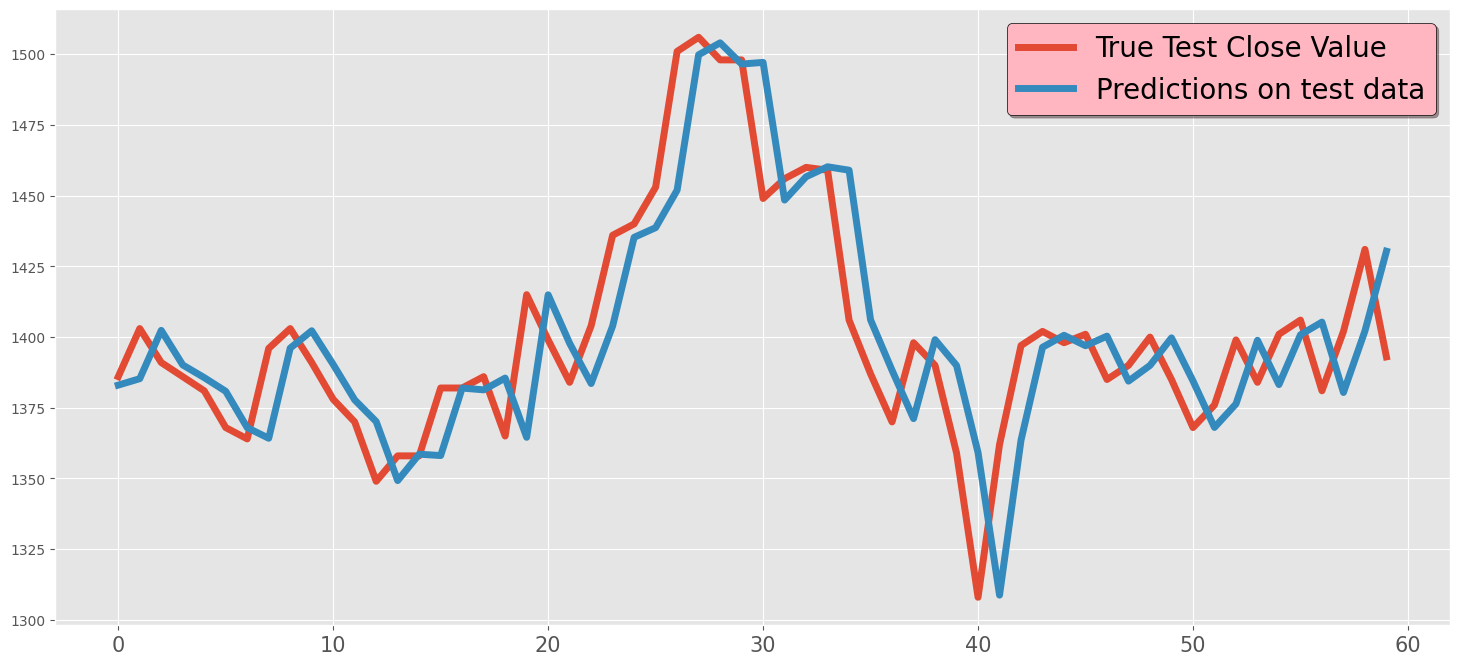

In [69]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(range(len(test_data)),test_data, label = 'True Test Close Value', linewidth = 5)
plt.plot(range(len(predictions)), predictions, label = 'Predictions on test data', linewidth = 5)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()

In [70]:
fc_series = pd.Series(predictions,index=test_data.index)
fc_series

Date
2023-11-17    [1383.0152086614357]
2023-11-20    [1385.2890128454023]
2023-11-21     [1402.364565173512]
2023-11-22     [1390.143569315671]
2023-11-23    [1385.6617557860693]
2023-11-24    [1380.8274571380705]
2023-11-27    [1367.9682123798218]
2023-11-28    [1364.2252387007816]
2023-11-29    [1396.0930825051212]
2023-11-30     [1402.229389336759]
2023-12-01    [1390.3023078971996]
2023-12-04    [1377.7904095323306]
2023-12-05    [1370.1215236860353]
2023-12-06    [1349.2520476329398]
2023-12-07    [1358.5913888793298]
2023-12-08    [1358.1090801398634]
2023-12-11    [1381.9660571528925]
2023-12-12    [1381.3413426740753]
2023-12-13      [1385.50083754135]
2023-12-14    [1364.5554628354596]
2023-12-15    [1414.9496082574246]
2023-12-18    [1397.7941424514324]
2023-12-19    [1383.5788233599371]
2023-12-20    [1403.9024242999221]
2023-12-21    [1435.2653291462625]
2023-12-22     [1438.686687992345]
2023-12-27    [1451.9497768774736]
2023-12-28    [1499.8159172025153]
2023-12-29    [

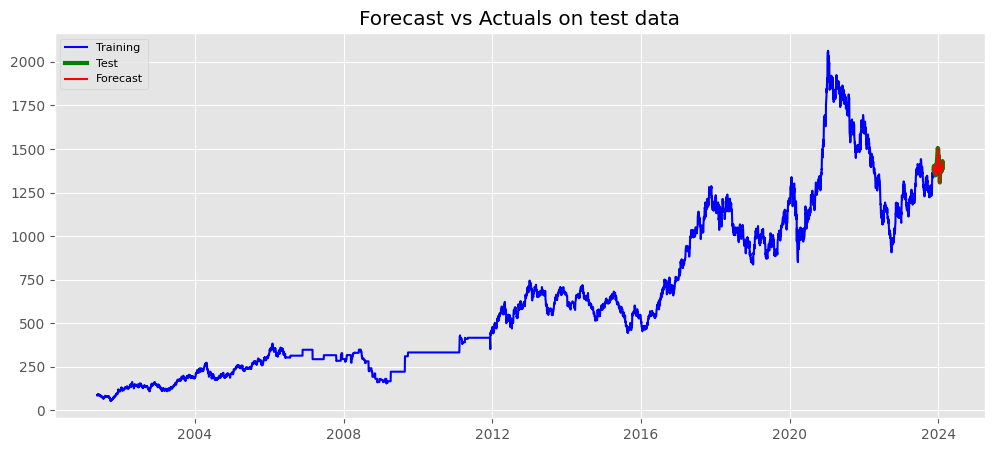

In [71]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='Training', color = 'blue')
plt.plot(test_data, label='Test', color = 'green', linewidth = 3)
plt.plot(fc_series, label='Forecast', color = 'red')
plt.title('Forecast vs Actuals on test data')
plt.legend(loc='upper left', fontsize=8)
plt.show()

## Forecasting stock price for next 60 days

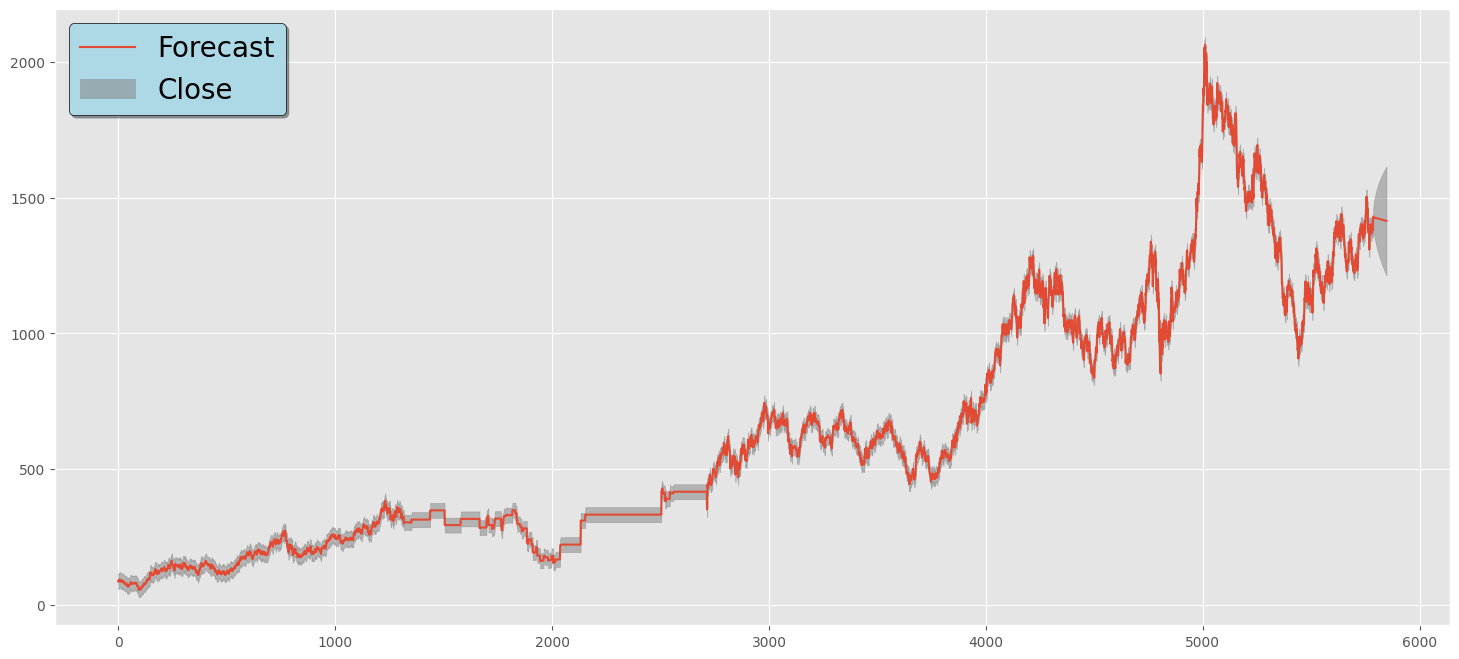

In [72]:
from statsmodels.graphics.tsaplots import plot_predict
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(111)
plot_predict(result=model,start=1, end=len(stock_data)+60, ax = ax1)
plt.grid("both")
plt.legend(['Forecast','Close','95% confidence interval'],fontsize = 20, shadow=True,facecolor='lightblue',edgecolor = 'k')
plt.show()

# Building SARIMAX Model

In [73]:
# evaluate parameters
import warnings
warnings.filterwarnings('ignore')
history = [x for x in train_data['Close']]
predictions = list()
conf_list = list()
for t in range(len(test_data['Close'])):
    model = sm.tsa.statespace.SARIMAX(history, order = (0,1,0), seasonal_order = (1,1,1,3))
    model_fit = model.fit()
    fc = model_fit.forecast()
    predictions.append(fc)
    history.append(test_data['Close'][t])
print('RMSE of SARIMA Model:', np.sqrt(mean_squared_error(test_data['Close'], predictions)))

RMSE of SARIMA Model: 22.53100017792959


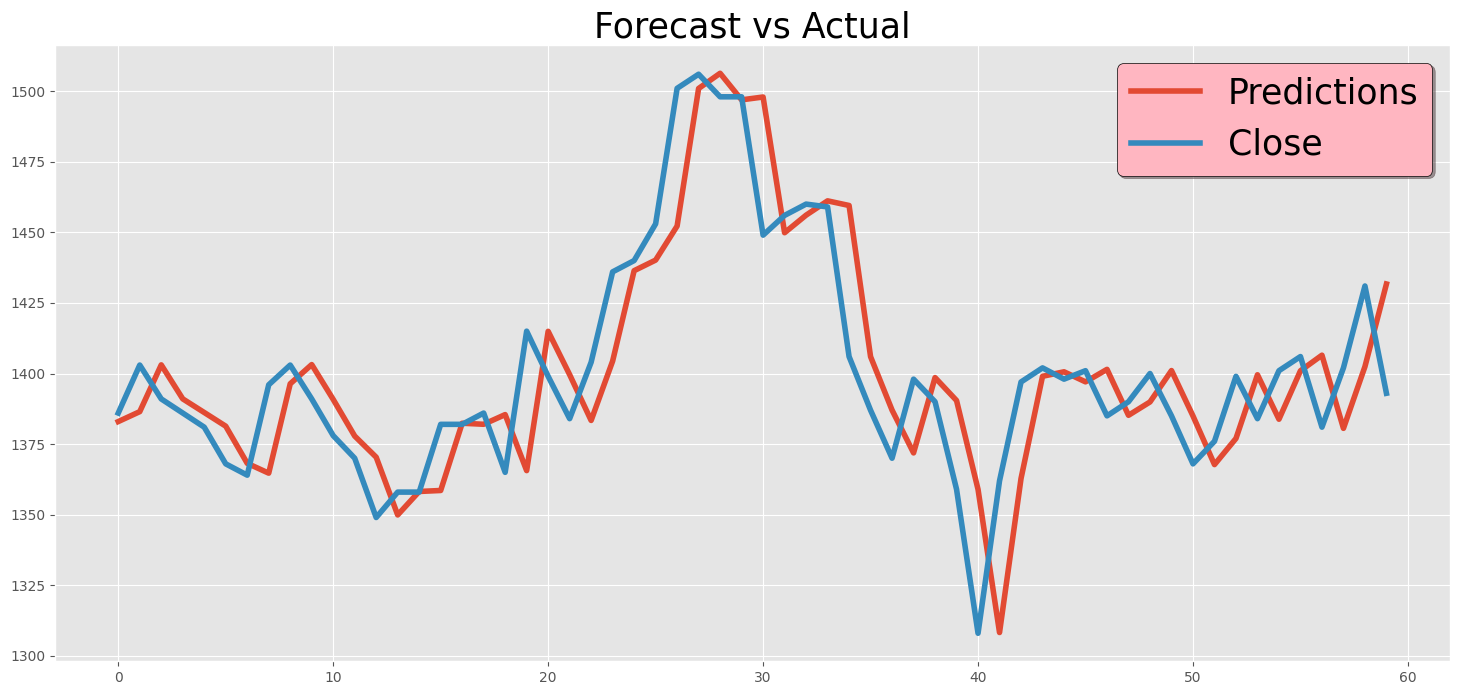

In [74]:
plt.figure(figsize=(18,8))
plt.title('Forecast vs Actual', fontsize = 25)
plt.plot(range(60), predictions, label = 'Predictions', linewidth = 4)
plt.plot(range(60), test_data['Close'], label = 'Close', linewidth = 4)
plt.legend(fontsize = 25, shadow=True,facecolor='lightpink',edgecolor = 'k')    

## Building a Time Series model using LSTM

In [75]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from copy import deepcopy as dc
import numpy as np
import pandas as pd


In [76]:
# Load your stock price data
# Assuming you have 'Date' and 'Close' columns in your dataset
# Replace 'your_data.csv' with the actual file path or use your preferred way of loading data
stock_data = pd.read_csv('SMSN.IL.csv')

# Convert 'Date' to datetime and set it as index
stock_data = stock_data[['Date','Close']]
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.set_index('Date', inplace=True)



In [77]:
stock_data

,Close
Date,
2001-05-14,88.500000
2001-05-15,87.309998
2001-05-16,84.750000
2001-05-17,89.489998
2001-05-18,89.430000
...,...
2024-02-07,1406.000000
2024-02-08,1381.000000
2024-02-09,1402.000000


In [78]:
# Function to prepare the dataset for LSTM
def prepare_dataframe_for_lstm(df, n_steps):
    df = dc(df)
    
    for i in range(1, n_steps + 1):
        df[f'Close(t-{i})'] = df['Close'].shift(i)
        
    df.dropna(inplace=True)
    
    return df



In [79]:
# Hyperparameters
lookback = 7
num_epochs = 10
batch_size = 16
learning_rate = 0.001

# Prepare dataset
shifted_df = prepare_dataframe_for_lstm(stock_data, lookback)
shifted_df_as_np = shifted_df.to_numpy()

# Scaling the dataset
scaler = MinMaxScaler(feature_range=(-1, 1))
shifted_df_as_np = scaler.fit_transform(shifted_df_as_np)

X = shifted_df_as_np[:, 1:]
y = shifted_df_as_np[:, 0]

X = dc(np.flip(X, axis=1))

split_index = int(len(X) * 0.95)
X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

X_train = X_train.reshape((-1, lookback, 1))
X_test = X_test.reshape((-1, lookback, 1))
y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

# Convert to PyTorch tensors
X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()
X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float()


In [80]:

# Define LSTM model
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        h0 = torch.zeros(self.num_stacked_layers, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers, x.size(0), self.hidden_size).to(device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

# Initialize the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LSTM(1, 4, 1).to(device)

In [81]:
# Loss function and optimizer
loss_function = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Create DataLoader
train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

# Training the model
for epoch in range(num_epochs):
    model.train()
    for batch in train_loader:
        inputs, targets = batch
        inputs, targets = inputs.to(device), targets.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_function(outputs, targets)
        loss.backward()
        optimizer.step()

# Evaluate the model
# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred = model(X_test.to(device)).cpu().numpy().flatten()

# Inverse transform the predictions and actual values
y_pred = y_pred.reshape(-1, 1).flatten()
y_true = y_test.numpy().reshape(-1, 1).flatten()

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(f'RMSE: {rmse}')


RMSE: 0.02879149094223976


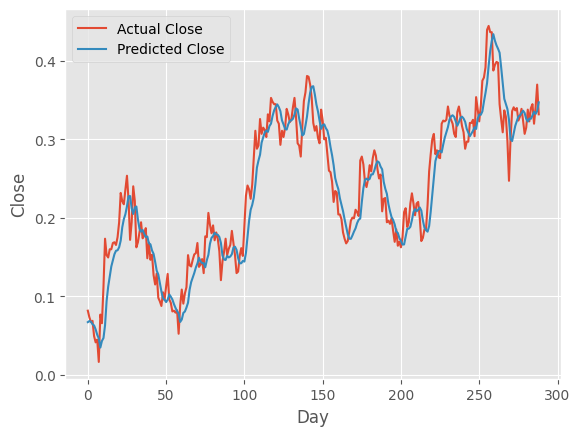

In [82]:
plt.plot(y_true, label='Actual Close')
plt.plot(y_pred, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()